### K-means Application

In [3]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'feature 2')

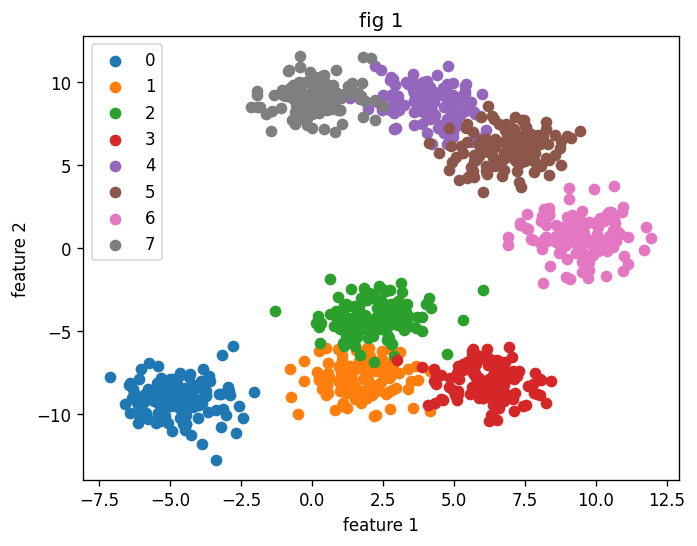

In [17]:
# making 8 blobs in 2D space
n_features = 2
centers = 8
X, y = make_blobs(n_samples=1000, centers=centers, n_features=n_features, random_state=68)

data = np.concatenate([X,y.reshape(-1,1)], axis=1)
df = pd.DataFrame(data, columns=[*[f'feature_{i}' for i in range(n_features)], 'y'])
df['y']=df['y'].astype(int)
plt.figure(dpi=120)
for center in range(centers):
    x1 = df[df['y']==center]['feature_0']
    x2 = df[df['y'] == center]['feature_1']
    plt.scatter(x1,x2, label =str(center))

plt.legend()
plt.title('fig 1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')


In [18]:
df_2 = df.drop('y', axis = 1)

Text(0, 0.5, 'feature 2')

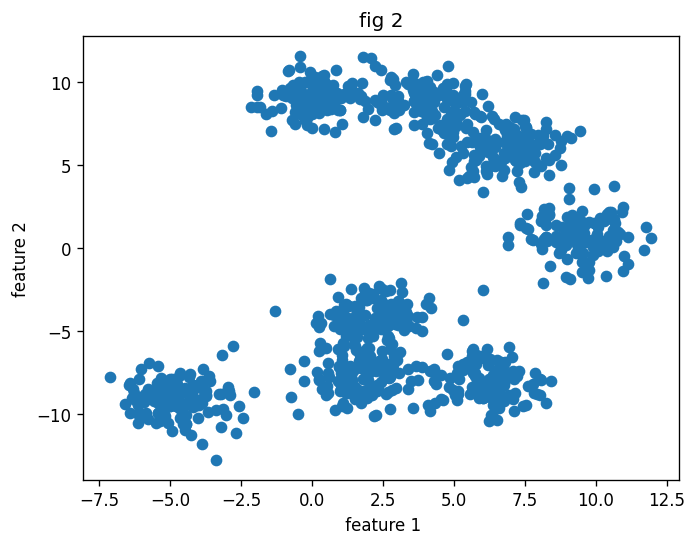

In [11]:
plt.figure(dpi=120)
x1 = df_2['feature_0']
x2 = df_2['feature_1']
plt.scatter(x1,x2)
plt.title( 'fig 2')
plt.xlabel(' feature 1')
plt.ylabel('feature 2')

### scaling the data

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_2)

In [21]:
X_scaled

array([[-2.00425026, -1.16156119],
       [-0.27310612, -0.64080816],
       [ 0.11042624,  1.38658902],
       ...,
       [ 0.41160531,  0.99393165],
       [ 1.42768264,  0.04086119],
       [-0.07576215,  1.05918488]])

### fitting the k means model

In [22]:
from sklearn.cluster import KMeans
from time import time

### deciding K